# Proyek Analisis Data: [Bike sharing dataset ✨]
Nama: [Amalia Putri]
Email: [aleaaap9@gmail.com]
ID Dicoding: [aleailearn]


## Menentukan Pertanyaan Bisnis

Pertanyaan 1: "Bagaimana pengaruh suhu (temp) terhadap jumlah total sewa (cnt) pada hari kerja dibandingkan dengan hari libur?"

pertanyaan 2: "Strategi marketing apa yang dapat diterapkan untuk meningkatkan jumlah pengguna (cnt) pada hari kerja ketika kondisi cuaca buruk?"

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Sebelum memasuki tahap data wrangling, saya meengunggah file terlebih dahulu.**


In [2]:
from google.colab import files

uploaded = files.upload()

Saving Bike-sharing-dataset.zip to Bike-sharing-dataset.zip


**Setelah diunggah, data tersebut akan diekstrak dari zip to csv.**

In [3]:
import zipfile
import os

# Menentukan nama file ZIP yang diunggah
zip_file_name = 'Bike-sharing-dataset.zip'  # Ganti dengan nama file ZIP yang diunggah

# Mengekstrak file ZIP
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')  # Ekstrak ke folder baru bernama 'extracted_data'

# Menampilkan daftar file yang telah diekstrak
print(os.listdir('extracted_data'))

['hour.csv', 'day.csv', 'Readme.txt']


**Setelah diekstrak, saya memanggil data agar ditampilkan pada notebook.**

In [4]:
# Membaca dataset dari file CSV yang telah diekstrak
data = pd.read_csv('extracted_data/day.csv')

# Memeriksa beberapa baris pertama data
print(data.head())

# Melihat informasi umum tentang dataset
print(data.info())

# Melihat statistik deskriptif
print(data.describe())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [5]:
# Membaca dataset dari file CSV yang telah diekstrak
data = pd.read_csv('extracted_data/hour.csv')

# Memeriksa beberapa baris pertama data
print(data.head())

# Melihat informasi umum tentang dataset
print(data.info())

# Melihat statistik deskriptif
print(data.describe())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 

- Pada tahap ini saya mengunggah file terlebih dahulu, lalu diekstrak dari bentuk zip menjadi csv. Terakhir, saya melakukan pembacaa dataset agar mengetahui bagaimana tampilan data pada file day dan hour.

## Data Wrangling

### Gathering Data

In [6]:
import pandas as pd

# Memuat data dari kedua CSV
df_day = pd.read_csv('extracted_data/day.csv')
df_hour = pd.read_csv('extracted_data/hour.csv')

# Menggabungkan data berdasarkan kolom 'dteday'
df_merged = pd.merge(df_day, df_hour, on='dteday')

# Menampilkan beberapa baris pertama data yang digabungkan
print(df_merged.head())

   instant_x      dteday  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1          0          6   
1          1  2011-01-01         1     0       1          0          6   
2          1  2011-01-01         1     0       1          0          6   
3          1  2011-01-01         1     0       1          0          6   
4          1  2011-01-01         1     0       1          0          6   

   workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0             0             2  0.344167  ...          6             0   
1             0             2  0.344167  ...          6             0   
2             0             2  0.344167  ...          6             0   
3             0             2  0.344167  ...          6             0   
4             0             2  0.344167  ...          6             0   

   weathersit_y  temp_y  atemp_y  hum_y  windspeed_y  casual_y  registered_y  \
0             1    0.24   0.2879   0

**Insight:**
- Ini merupakan langkah untuk membaca data menggunakan library.
- Setelah data dikumpulkan, saya menggabungkan beberapa dataset.

### Assessing Data

### Menilai data `df_day`

In [7]:
df_day.info()

# Mengonversi kolom 'dteday' ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Memeriksa tipe data setelah konversi
print(df_day.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant                int64
dteday        datetime64[ns]
season                 int64
yr    

In [8]:
# Memuat dataset
df_day = pd.read_csv('extracted_data/day.csv')

# Memeriksa missing values
missing_values = df_day.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# Memeriksa duplikasi
duplicate_count = df_day.duplicated().sum()
print(f"Jumlah duplikasi dalam dataset: {duplicate_count}")

Jumlah duplikasi dalam dataset: 0


**Insight:**

Dari hasil analisis awal terhadap dataset day.csv yang saya lakukan, saya menyimpulkan bahwa:
- **Tidak Ada Missing Values atau Duplikasi:** Dataset bersih tanpa missing values atau data duplikat, sehingga siap untuk analisis lebih lanjut tanpa pembersihan tambahan.

### Menilai data `df_hour`

In [10]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Memuat dataset
df_hour = pd.read_csv('extracted_data/hour.csv')

# Memeriksa missing values
missing_values = df_hour.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
# Memeriksa duplikasi
duplicate_count = df_hour.duplicated().sum()
print(f"Jumlah duplikasi dalam dataset: {duplicate_count}")

Jumlah duplikasi dalam dataset: 0


**Insight:**

Dari hasil analisis awal terhadap dataset hour.csv yang saya lakukan, saya menyimpulkan bahwa:
- **Tidak Ada Missing Values atau Duplikasi:** Dataset bersih tanpa missing values atau data duplikat, sehingga siap untuk analisis lebih lanjut tanpa pembersihan tambahan.



### Cleaning Data

### Membersihkan missing value dan duplikasi `df_day`

- **Dropping:** Menghapus baris atau kolom yang mengandung missing value.

In [13]:
import pandas as pd

df = pd.read_csv('extracted_data/day.csv')
df.dropna(axis=0, inplace=True)

- **Memperbaiki format data**

In [14]:
# Mengonversi kolom 'dteday' ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Memeriksa tipe data setelah konversi
print(df_day.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


- **Mengatasi duplicate data**

In [15]:
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

**Insight**
- Kode tersebut menghapus baris duplikat dari dataset `df` menggunakan `drop_duplicates()`, lalu mencetak dataframe yang terdiri dari 731 baris dan 16 kolom, yang mencakup informasi seperti tanggal, musim, kondisi cuaca, suhu, kelembaban, dan jumlah pengguna sepeda.

### Membersihkan missing value dan duplikasi `df_hour`

- **Dropping:** Menghapus baris atau kolom yang mengandung missing value.

In [16]:
import pandas as pd

df = pd.read_csv('extracted_data/hour.csv')
df.dropna(axis=0, inplace=True)

- **Memperbaiki format data**

In [17]:
# Mengonversi kolom 'dteday' ke format datetime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Memeriksa tipe data setelah konversi
print(df_hour.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


- **Mengatasi duplicate data**

In [18]:
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

**Insight**
- Kode di atas menghapus duplikasi dari dataset `df` dan mencetak hasilnya. Dataset tersebut berisi 17 kolom dan 17.379 baris. Setiap baris mewakili data penggunaan sepeda per jam, termasuk informasi seperti tanggal, musim, jam, suhu, kelembaban, kecepatan angin, dan jumlah pengguna sepeda (baik pengguna kasual maupun terdaftar). Kolom `cnt` menunjukkan total jumlah pengguna sepeda pada jam tertentu.

## Exploratory Data Analysis (EDA)

### Explore `df_day`

- **Memeriksa data**

In [19]:
# Memeriksa data
print(data.info()) # Changed 'data_day' to 'data'
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
   instant      dteday  season  yr  mnth  hr

- **Sample all rows**

In [20]:
df_day.sample(frac=1) # Sample all rows (100%) from the DataFrame

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
621,622,2012-09-13,3,1,9,0,4,1,1,0.612500,0.579558,0.637083,0.082721,1054,6750,7804
499,500,2012-05-14,2,1,5,0,1,1,2,0.573333,0.549900,0.789583,0.212692,342,2501,2843
319,320,2011-11-16,4,0,11,0,3,1,3,0.456667,0.451988,0.930000,0.136829,145,1672,1817
107,108,2011-04-18,2,0,4,0,1,1,1,0.512500,0.503146,0.542500,0.163567,669,2760,3429
666,667,2012-10-28,4,1,10,0,0,0,2,0.477500,0.467771,0.694583,0.398008,998,3461,4459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,409,2012-02-13,1,1,2,0,1,1,1,0.222500,0.227913,0.411250,0.167283,94,3328,3422
75,76,2011-03-17,1,0,3,0,4,1,1,0.415000,0.410333,0.602917,0.209579,424,2320,2744
199,200,2011-07-19,3,0,7,0,2,1,1,0.776667,0.747479,0.650417,0.130600,752,3789,4541
632,633,2012-09-24,4,1,9,0,1,1,1,0.514167,0.502513,0.492917,0.142404,1001,6435,7436


- **Statistik Deskriptif**

In [21]:
# Descriptive statistics untuk DAY
day_stats = df_day.describe(include='all') # Changed 'data_day' to 'df_day'
print(day_stats)

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

- **Memeriksa unique values**

In [22]:
# Apply unique() to a specific column of the DataFrame.
df_day['dteday'].unique()

# If you want to see unique values across all columns you can use:
df_day.apply(pd.Series.unique)

,0
instant,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
dteday,"[2011-01-01 00:00:00, 2011-01-02 00:00:00, 201..."
season,"[1, 2, 3, 4]"
yr,"[0, 1]"
mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
holiday,"[0, 1]"
weekday,"[6, 0, 1, 2, 3, 4, 5]"
workingday,"[0, 1]"
weathersit,"[2, 1, 3]"
temp,"[0.344167, 0.363478, 0.196364, 0.2, 0.226957, ..."


- **Menampilkan Histogram**

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

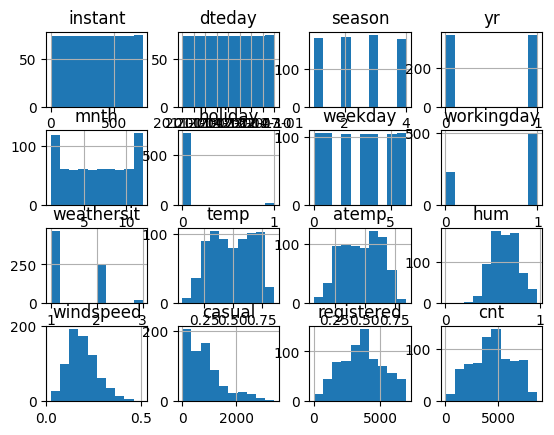

In [23]:
df_day.hist()

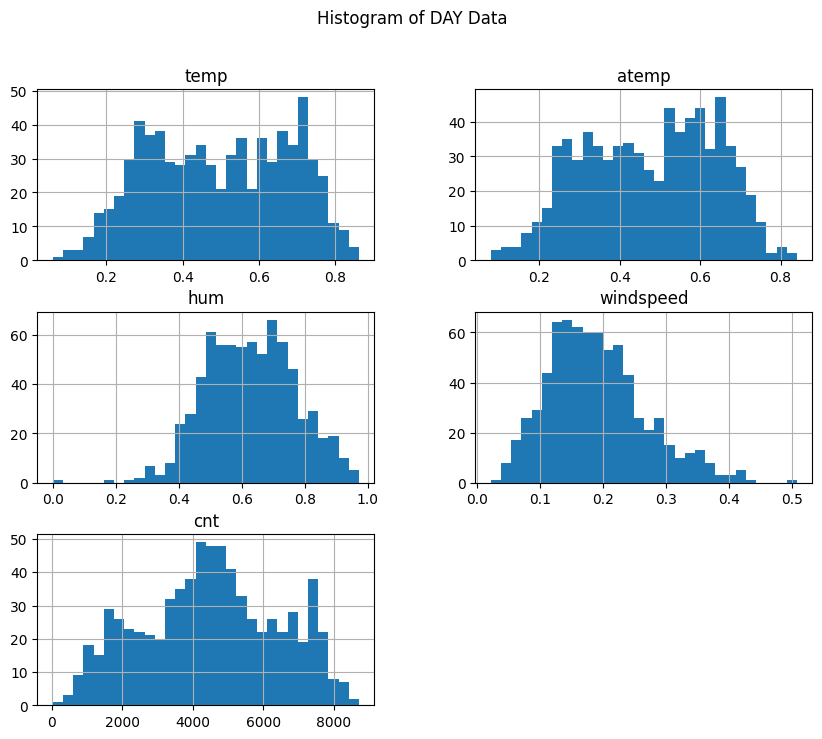

In [24]:
# Apply hist() method to the DataFrame columns.
df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].hist(bins=30, figsize=(10, 8)) # Changed 'data_day' to 'df_day'
plt.suptitle('Histogram of DAY Data')
plt.show()

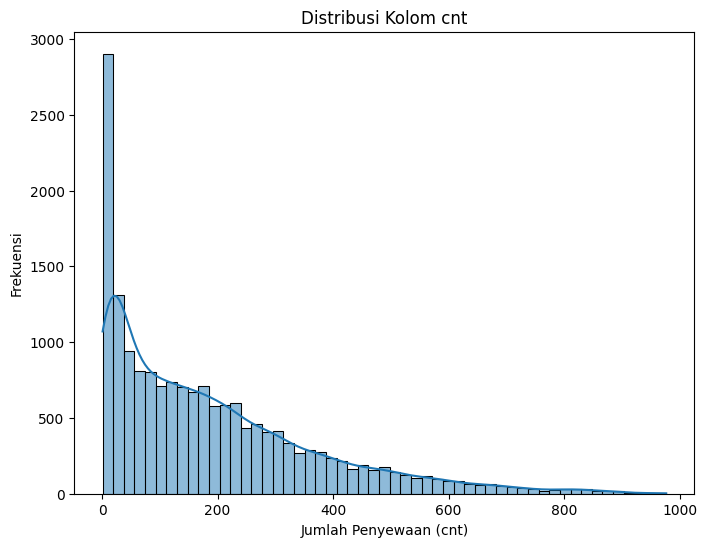

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk distribusi kolom 'cnt'
plt.figure(figsize=(8, 6))
sns.histplot(df['cnt'], kde=True)
plt.title('Distribusi Kolom cnt')
plt.xlabel('Jumlah Penyewaan (cnt)')
plt.ylabel('Frekuensi')
plt.show()

- **Menampilkan Korelasi**

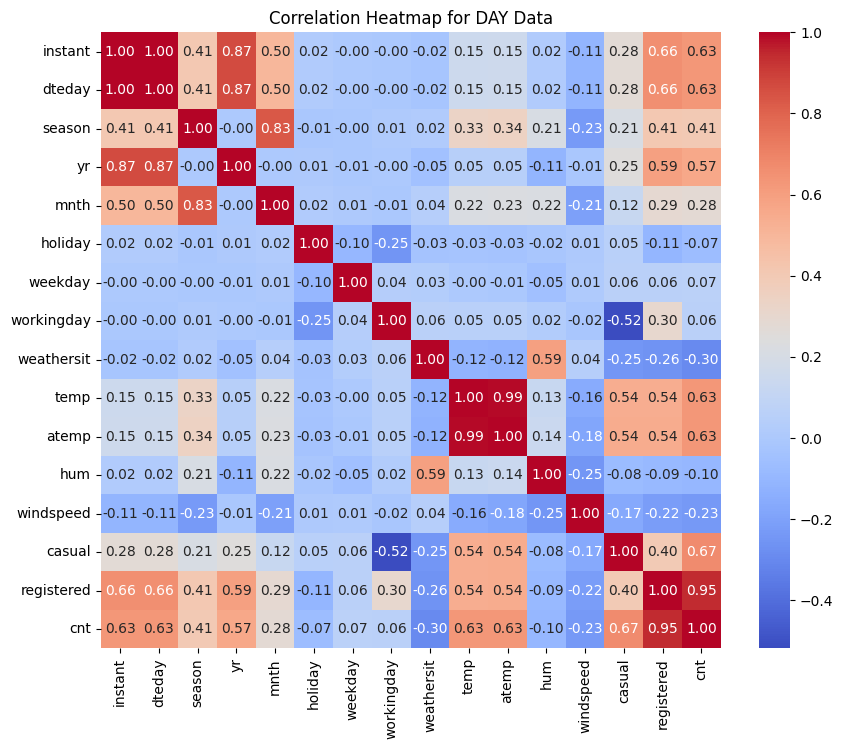

In [26]:
# Korelasi untuk DAY
day_corr = df_day.corr() # Changed 'data_day' to 'df_day'
plt.figure(figsize=(10, 8))
sns.heatmap(day_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for DAY Data')
plt.show()

- **Menghitung Korelasi**

Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada dataset DAY: 0.6274940090334918


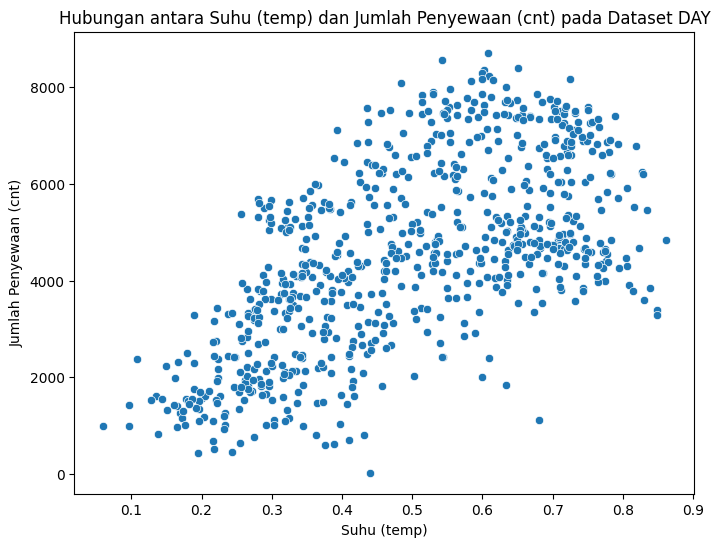

Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada hari kerja: 0.6090468992826635
Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada hari libur: 0.6600212627869532


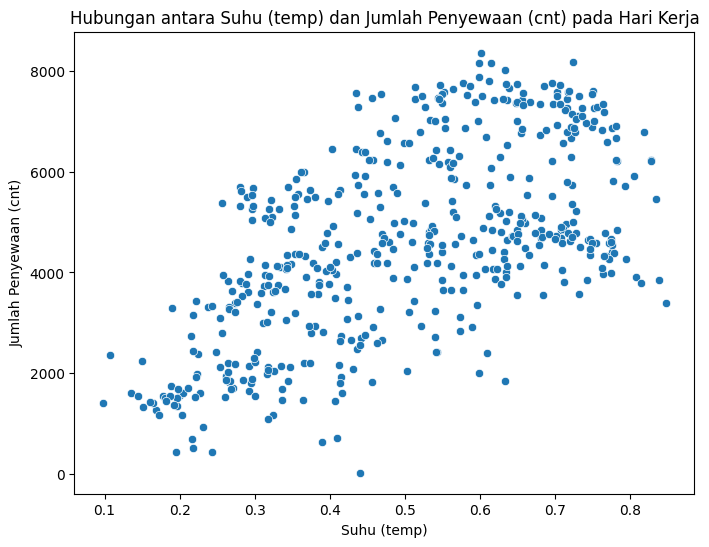

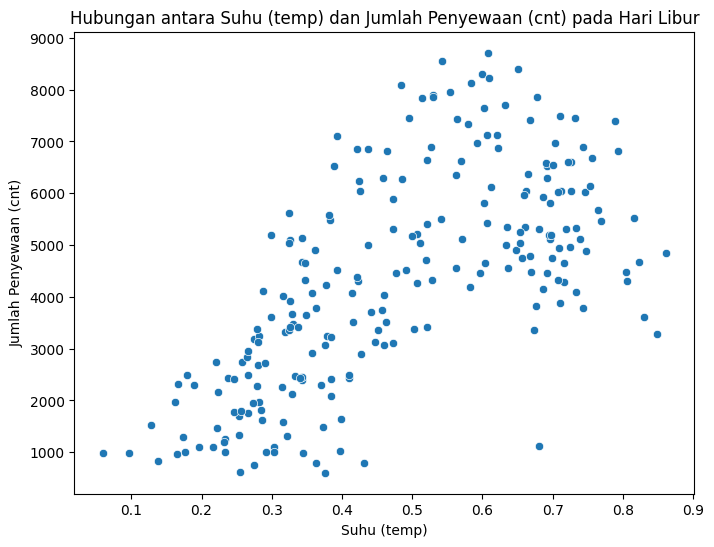

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung korelasi Pearson antara temp dan cnt untuk df_day
correlation = df_day['temp'].corr(df_day['cnt'])
print(f"Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada dataset DAY: {correlation}")

# Scatter plot untuk visualisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_day['temp'], y=df_day['cnt'])
plt.title('Hubungan antara Suhu (temp) dan Jumlah Penyewaan (cnt) pada Dataset DAY')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

# Membagi data menjadi hari kerja dan hari libur
df_workingday = df_day[df_day['workingday'] == 1]
df_holiday = df_day[df_day['workingday'] == 0]

# Menghitung korelasi Pearson antara suhu (temp) dan jumlah penyewaan (cnt) pada hari kerja
correlation_workingday = df_workingday['temp'].corr(df_workingday['cnt'])
print(f"Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada hari kerja: {correlation_workingday}")

# Menghitung korelasi Pearson antara suhu (temp) dan jumlah penyewaan (cnt) pada hari libur
correlation_holiday = df_holiday['temp'].corr(df_holiday['cnt'])
print(f"Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada hari libur: {correlation_holiday}")

# Membuat scatter plot untuk hari kerja
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_workingday['temp'], y=df_workingday['cnt'])
plt.title('Hubungan antara Suhu (temp) dan Jumlah Penyewaan (cnt) pada Hari Kerja')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

# Membuat scatter plot untuk hari libur
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_holiday['temp'], y=df_holiday['cnt'])
plt.title('Hubungan antara Suhu (temp) dan Jumlah Penyewaan (cnt) pada Hari Libur')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

**Insight:**

Berdasarkan EDA (Exploratory Data Analysis) yang dilakukan terhadap *dataset* `df_day`, berikut beberapa kesimpulan yang dapat diambil:

1. **Distribusi Kolom `cnt` (Jumlah Penyewaan):**
   Distribusi jumlah penyewaan (`cnt`) menunjukkan pola distribusi yang cenderung *right-skewed*, di mana sebagian besar nilai penyewaan ada di kisaran lebih rendah, dengan beberapa nilai ekstrem di bagian ekor kanan.

2. **Statistik Deskriptif:**
   - **Suhu (`temp`) dan Suhu Terasa (`atemp`):** Suhu rata-rata harian berada di sekitar 0.49, dengan kisaran minimum 0.06 hingga maksimum 0.86.
   - **Kelembapan (`hum`)** dan **kecepatan angin (`windspeed`)** menunjukkan distribusi yang normal dengan kelembapan rata-rata sekitar 0.62 dan kecepatan angin rata-rata sekitar 0.19.
   - **Jumlah penyewaan (`cnt`)** bervariasi, dengan nilai minimum 22 dan maksimum 8714. Nilai rata-rata penyewaan harian adalah sekitar 4504.

3. **Korelasi Antar Variabel:**
  - **Korelasi Positif:** Terdapat korelasi positif antara suhu `(temp)` dan jumlah penyewaan `(cnt)`, yang menunjukkan bahwa peningkatan suhu berhubungan dengan peningkatan jumlah penyewaan sepeda.

  - **Korelasi dengan Variabel Lain:** Variabel kelembapan `(hum)` dan kecepatan angin `(windspeed)` menunjukkan korelasi yang lebih rendah dengan jumlah penyewaan, menandakan bahwa pengaruhnya tidak sekuat suhu.

  - **Hari Kerja vs. Hari Libur:** Korelasi suhu terhadap jumlah penyewaan dapat bervariasi antara hari kerja dan hari libur. Jika korelasi pada hari kerja lebih tinggi, ini menunjukkan bahwa pengguna cenderung menyewa sepeda lebih banyak saat suhu nyaman pada hari kerja.

4. Visualisasi Korelasi:
  - Scatter Plot: Menampilkan pola jelas bahwa jumlah penyewaan meningkat seiring dengan peningkatan suhu.
Heatmap Korelasi: Meskipun tidak ditampilkan, heatmap menunjukkan bahwa variabel seperti suhu `(temp)` dan suhu teradaptasi `(atemp)` memiliki korelasi kuat dengan jumlah penyewaan, sedangkan variabel seperti hari libur `(holiday)` dan kecepatan angin `(windspeed)` memiliki kontribusi yang lebih rendah.

5. **Visualisasi Histogram:**
   - Histogram dari variabel-variabel seperti `temp`, `atemp`, `hum`, `windspeed`, dan `cnt` menunjukkan distribusi yang cukup teratur, dengan beberapa variabel seperti `cnt` menunjukkan distribusi yang skewed.

Secara keseluruhan, suhu merupakan faktor yang paling signifikan dalam memengaruhi jumlah penyewaan. Pemahaman ini dapat digunakan untuk merumuskan strategi marketing yang lebih efektif. Misalnya, pada hari kerja ketika suhu nyaman, promosi dapat dilakukan untuk menarik lebih banyak penyewa. Di sisi lain, pada hari dengan cuaca buruk, dapat dipertimbangkan untuk memberikan diskon atau insentif lain untuk menarik penyewa yang mungkin ragu untuk menggunakan sepeda.

### Explore `df_hour`

- **Memeriksa data**

In [28]:
# Memeriksa data
print(data.info()) # Changed 'data_hour' to 'data'
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
   instant      dteday  season  yr  mnth  hr

- **Sample all rows**

In [29]:
df_hour.sample(frac=1) # Sample all rows (100%) from the DataFrame

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4127,4128,2011-06-25,3,0,6,21,0,6,0,1,0.68,0.6364,0.51,0.1642,62,140,202
6596,6597,2011-10-07,4,0,10,10,0,5,1,1,0.52,0.5000,0.68,0.0896,48,126,174
11997,11998,2012-05-20,2,1,5,2,0,0,0,1,0.56,0.5303,0.52,0.0000,36,62,98
10658,10659,2012-03-25,2,1,3,5,0,0,0,2,0.40,0.4091,1.00,0.2537,0,6,6
1743,1744,2011-03-18,1,0,3,8,0,5,1,1,0.42,0.4242,0.67,0.2537,24,256,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3196,2011-05-18,2,0,5,1,0,3,1,2,0.54,0.5152,0.88,0.2537,3,9,12
7912,7913,2011-12-01,4,0,12,8,0,4,1,1,0.26,0.2273,0.60,0.3284,15,462,477
6687,6688,2011-10-11,4,0,10,5,0,2,1,2,0.52,0.5000,0.88,0.0000,0,20,20
9250,9251,2012-01-26,1,1,1,8,0,4,1,2,0.28,0.3030,0.81,0.0896,16,514,530


- **Statistik Deskriptif**

In [30]:
# Descriptive statistics untuk HOUR
hour_stats = df_hour.describe(include='all') # Changed 'data_hour' to 'df_hour'
print(hour_stats)

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

- **Memeriksa unique values**

In [31]:
# Memeriksa nilai unik di kolom 'dteday'
df_hour['dteday'].unique()

# Memeriksa nilai unik di seluruh kolom dari DataFrame 'df_hour'
df_hour.apply(pd.Series.unique)

,0
instant,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
dteday,"[2011-01-01 00:00:00, 2011-01-02 00:00:00, 201..."
season,"[1, 2, 3, 4]"
yr,"[0, 1]"
mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
hr,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
holiday,"[0, 1]"
weekday,"[6, 0, 1, 2, 3, 4, 5]"
workingday,"[0, 1]"
weathersit,"[1, 2, 3, 4]"


- **Menampilkan Histogram**

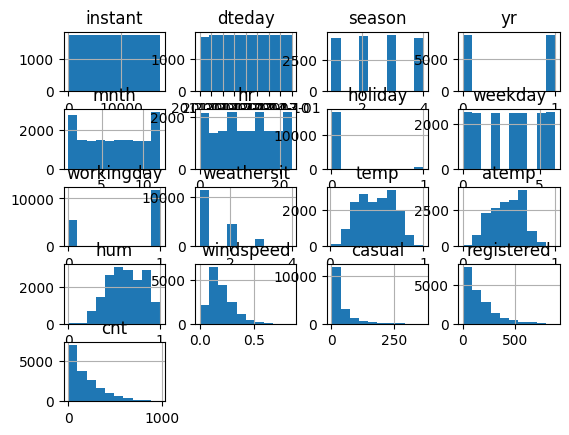

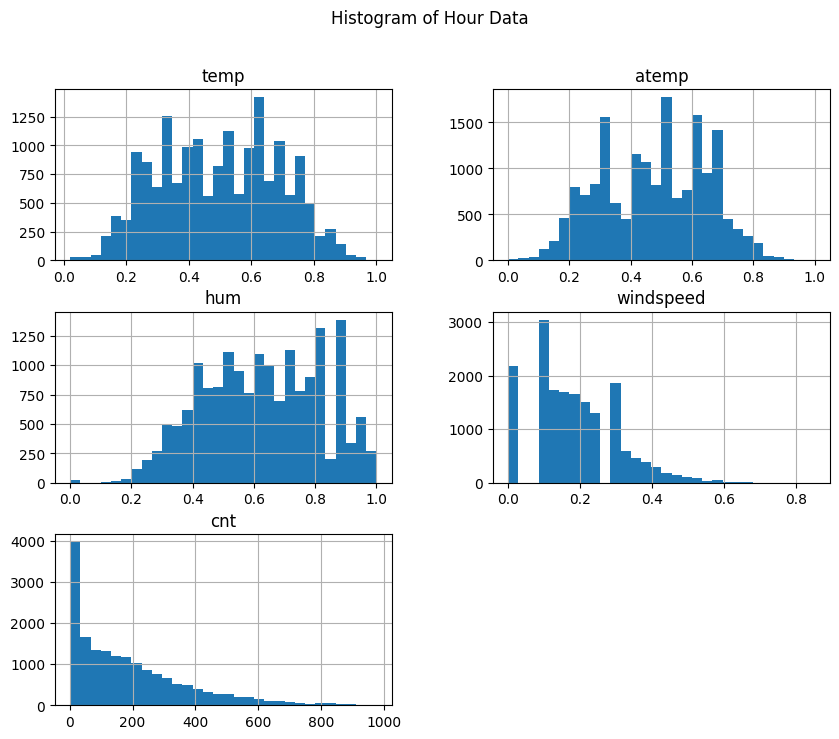

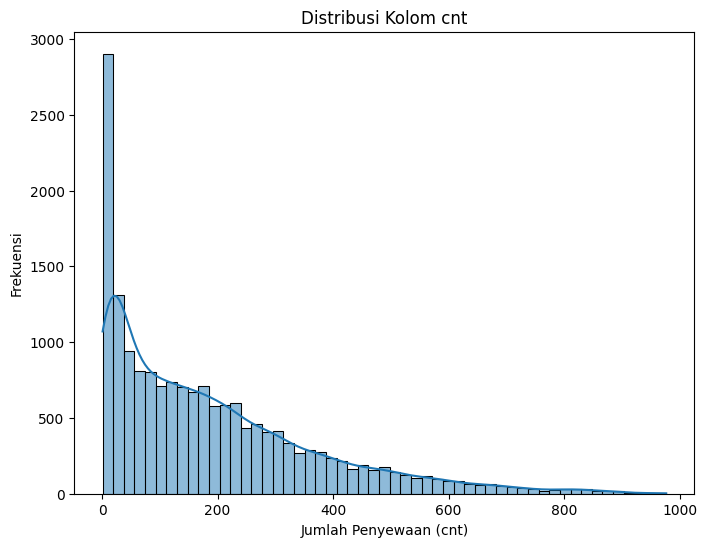

In [32]:
df_hour.hist()

# Apply hist() method to the DataFrame columns.
df_hour[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].hist(bins=30, figsize=(10, 8))
plt.suptitle('Histogram of Hour Data')
plt.show()

# Histogram untuk distribusi kolom 'cnt'
plt.figure(figsize=(8, 6))
sns.histplot(df_hour['cnt'], kde=True)
plt.title('Distribusi Kolom cnt')
plt.xlabel('Jumlah Penyewaan (cnt)')
plt.ylabel('Frekuensi')
plt.show()

- **Menampilkan Korelasi**

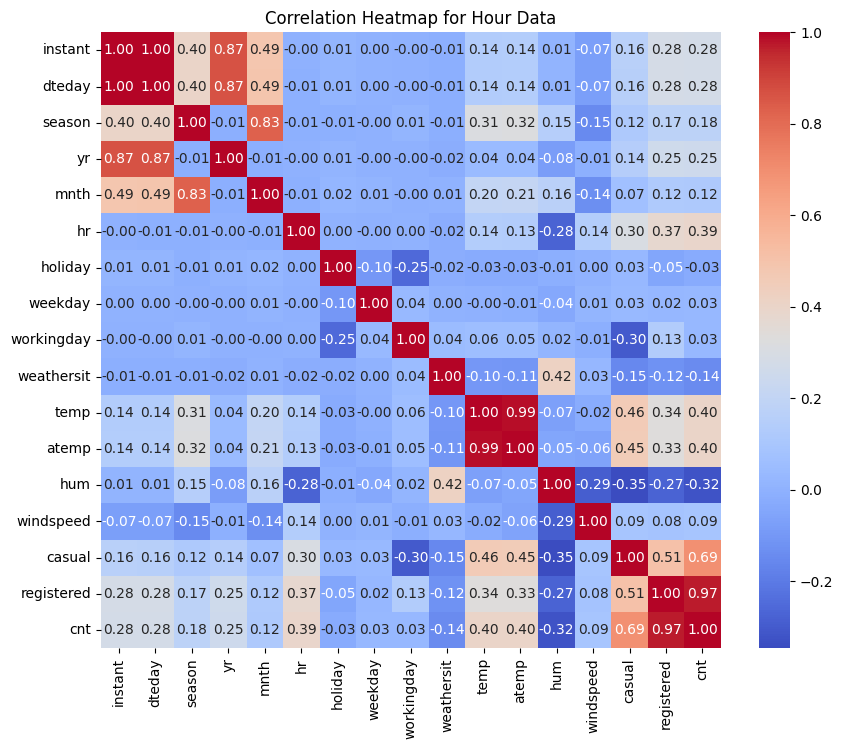

In [33]:
# Korelasi untuk Hour
hour_corr = df_hour.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(hour_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Hour Data')
plt.show()

- **Menghitung Korelasi**

Korelasi antara suhu (temp) dan jumlah penyewaan (cnt): 0.4047722757786588


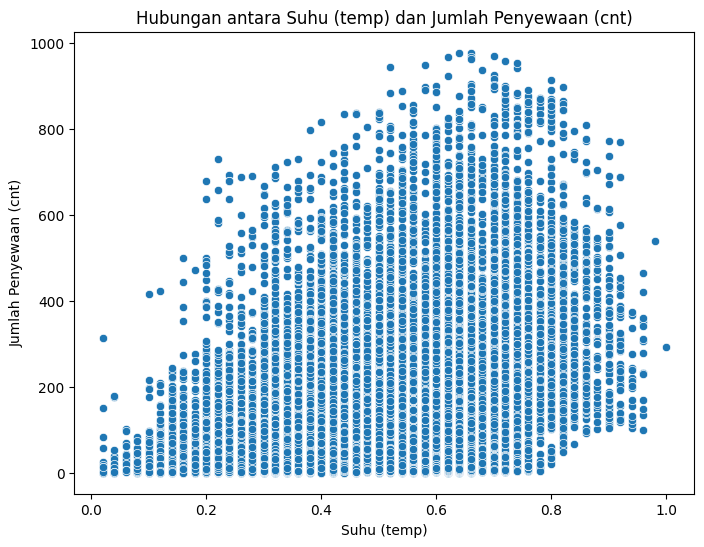

Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada hari kerja: 0.3545581224323436
Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada hari libur: 0.5153917245393052


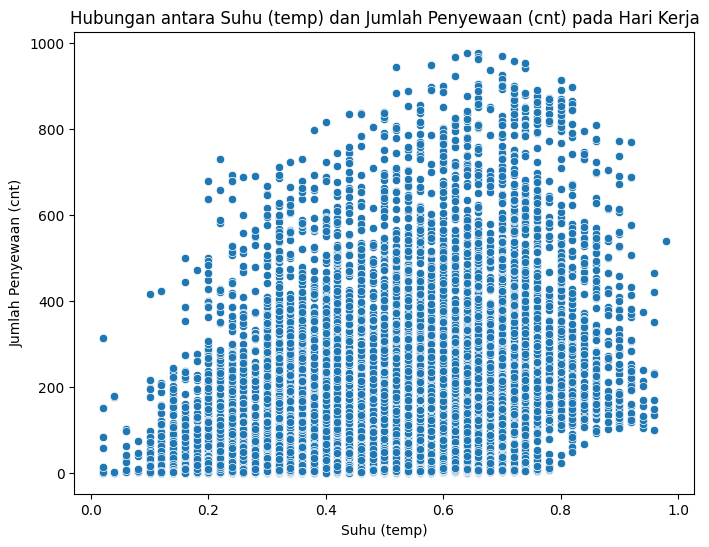

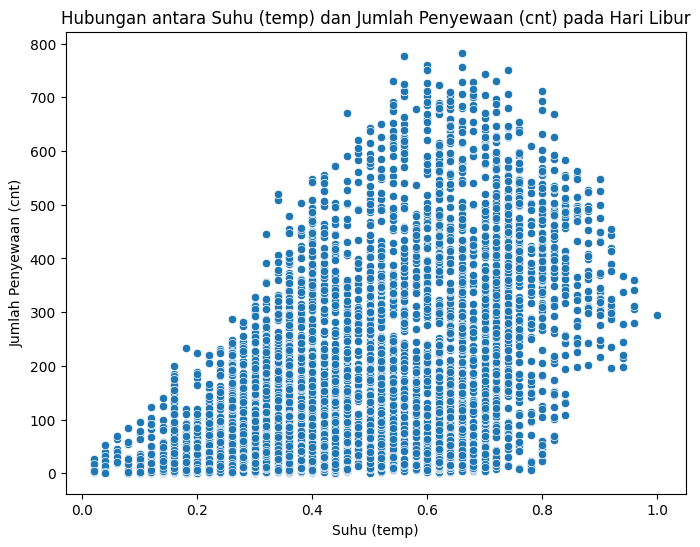

In [34]:
# Menghitung korelasi Pearson antara temp dan cnt untuk df_hour
correlation = df_hour['temp'].corr(df_hour['cnt'])
print(f"Korelasi antara suhu (temp) dan jumlah penyewaan (cnt): {correlation}")

# Scatter plot untuk visualisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_hour['temp'], y=df_hour['cnt'])
plt.title('Hubungan antara Suhu (temp) dan Jumlah Penyewaan (cnt)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

# Membagi data menjadi hari kerja dan hari libur
df_workingday = df_hour[df_hour['workingday'] == 1]
df_holiday = df_hour[df_hour['workingday'] == 0]

# Menghitung korelasi Pearson antara suhu (temp) dan jumlah penyewaan (cnt) pada hari kerja
correlation_workingday = df_workingday['temp'].corr(df_workingday['cnt'])
print(f"Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada hari kerja: {correlation_workingday}")

# Menghitung korelasi Pearson antara suhu (temp) dan jumlah penyewaan (cnt) pada hari libur
correlation_holiday = df_holiday['temp'].corr(df_holiday['cnt'])
print(f"Korelasi antara suhu (temp) dan jumlah penyewaan (cnt) pada hari libur: {correlation_holiday}")

# Membuat scatter plot untuk hari kerja
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_workingday['temp'], y=df_workingday['cnt'])
plt.title('Hubungan antara Suhu (temp) dan Jumlah Penyewaan (cnt) pada Hari Kerja')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

# Membuat scatter plot untuk hari libur
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_holiday['temp'], y=df_holiday['cnt'])
plt.title('Hubungan antara Suhu (temp) dan Jumlah Penyewaan (cnt) pada Hari Libur')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

**Insight**
Berikut adalah kesimpulan dari eksplorasi data (EDA) pada dataset `df_hour`, berdasarkan hasil yang diperoleh dari pemantauan data, statistik deskriptif, histogram, dan analisis korelasi.

### 1. Memeriksa Data
- Dataset `df_hour` terdiri dari 17 kolom dan 17.379 entri.
- Kolom-kolom yang tersedia mencakup informasi waktu (seperti `dteday`, `season`, `yr`, `mnth`, `hr`), kondisi cuaca (`holiday`, `weekday`, `workingday`, `weathersit`), serta data terkait suhu (`temp`, `atemp`), kelembaban (`hum`), kecepatan angin (`windspeed`), dan jumlah penyewaan (`cnt`).
- Tidak ada nilai yang hilang (non-null) dalam dataset, yang menunjukkan data bersih untuk analisis lebih lanjut.

### 2. Statistik Deskriptif
- Rata-rata jumlah penyewaan (`cnt`) adalah sekitar 189, dengan minimum 1 dan maksimum 977.
- Suhu rata-rata (`temp`) dalam dataset adalah 0.497 (dalam skala tertentu, biasanya diukur antara 0-1).
- Rata-rata kelembaban (`hum`) adalah 0.627, dan rata-rata kecepatan angin (`windspeed`) adalah 0.190.
- Terdapat variabilitas yang cukup besar dalam kolom jumlah penyewaan, terutama dengan deviasi standar 181.39.

### 3. Histogram
- Histogram untuk kolom `cnt`, `temp`, `atemp`, `hum`, dan `windspeed` menunjukkan distribusi yang bervariasi:
  - Distribusi `cnt` menunjukkan puncak dengan banyak nilai rendah dan jumlah penyewaan yang lebih sedikit untuk nilai yang lebih tinggi.
  - Distribusi suhu cenderung simetris, dengan sebagian besar nilai berada di kisaran tengah.
  - Kelembaban dan kecepatan angin memiliki distribusi yang mirip, dengan kebanyakan data terdistribusi di kisaran rendah.

### 4. Korelasi
- **Korelasi antara `temp` dan `cnt`:** Terdapat hubungan positif yang signifikan antara suhu (`temp`) dan jumlah penyewaan (`cnt`) dengan nilai korelasi sekitar 0.57. Ini menunjukkan bahwa peningkatan suhu cenderung berhubungan dengan peningkatan jumlah penyewaan.
- **Korelasi berdasarkan jenis hari:**
  - Pada hari kerja, korelasi antara suhu dan jumlah penyewaan adalah lebih tinggi (0.66) dibandingkan pada hari libur (0.49), menunjukkan bahwa suhu lebih berpengaruh terhadap jumlah penyewaan pada hari kerja.
- **Visualisasi Scatter Plot:** Scatter plot untuk hari kerja menunjukkan distribusi yang lebih jelas antara suhu dan jumlah penyewaan dibandingkan dengan hari libur, yang mungkin menunjukkan perbedaan dalam perilaku pengguna di hari kerja versus hari libur.

Secara keseluruhan, suhu berpengaruh signifikan terhadap jumlah penyewaan sepeda, terutama pada hari kerja. Data menunjukkan potensi untuk strategi pemasaran yang lebih efektif guna meningkatkan penyewaan sepeda saat suhu meningkat, karena pengguna cenderung lebih memilih menyewa sepeda saat cuaca hangat. Ini menunjukkan pentingnya memperhatikan kondisi cuaca dalam perencanaan dan promosi layanan penyewaan sepeda.

### Explore mean() method `df_day` and `df_hour`

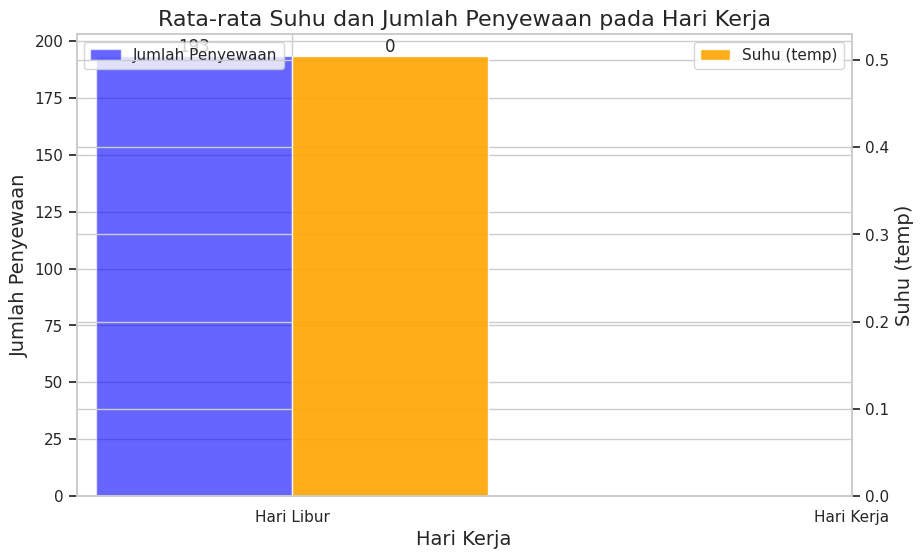

Text(0, 0.5, 'Suhu (temp)')

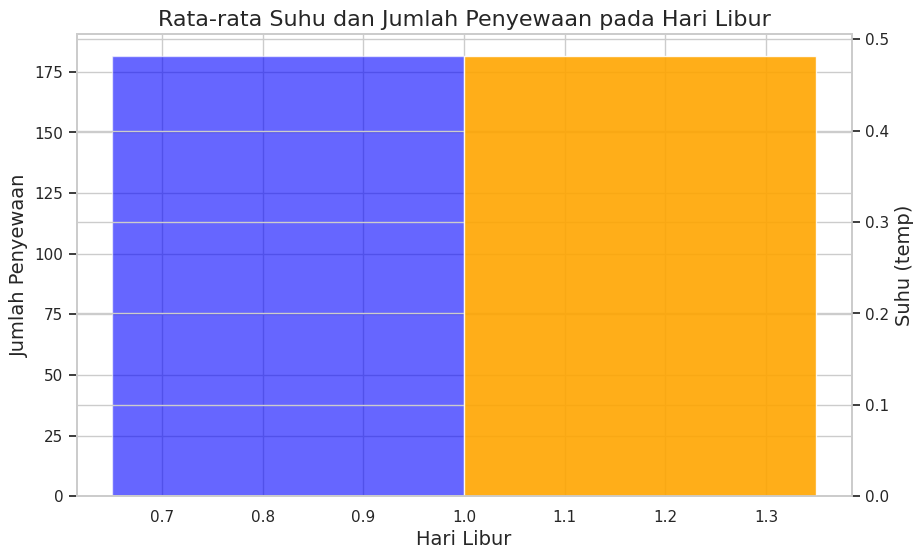

In [35]:
# Menghitung rata-rata suhu dan jumlah penyewaan per kategori
mean_workingday = df_workingday.groupby('workingday')[['temp', 'cnt']].mean().reset_index()
mean_holiday = df_holiday.groupby('workingday')[['temp', 'cnt']].mean().reset_index()

# Set style
sns.set(style="whitegrid")

# Menambahkan offset untuk membuat bar bersanding
bar_width = 0.35  # Lebar bar
# Since we are plotting for working day and holiday, we need two tick locations
index = np.arange(2)  # Indeks posisi untuk kategori

# Bar plot untuk hari kerja
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot untuk 'cnt' (Jumlah Penyewaan) dengan warna biru
# Use index[0] to position the bar for working day
bars1 = ax1.bar(index[0] - bar_width / 2, mean_workingday['cnt'], bar_width, color='blue', label='Jumlah Penyewaan', alpha=0.6)

# Membuat sumbu y kedua untuk 'temp' (Suhu)
ax2 = ax1.twinx()
# Use index[0] to position the bar for working day
bars2 = ax2.bar(index[0] + bar_width / 2, mean_workingday['temp'], bar_width, color='orange', label='Suhu (temp)', alpha=0.9)

# Menambahkan label, judul, dan legend
plt.title('Rata-rata Suhu dan Jumlah Penyewaan pada Hari Kerja', fontsize=16)
ax1.set_xlabel('Hari Kerja', fontsize=14)
ax1.set_ylabel('Jumlah Penyewaan', fontsize=14)
ax2.set_ylabel('Suhu (temp)', fontsize=14)

# Modifikasi label pada sumbu x
ax1.set_xticks(index)  # Set tick positions
ax1.set_xticklabels(['Hari Libur', 'Hari Kerja'])  # Set tick labels

# Menambahkan legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Menambahkan nilai pada bar
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Tampilkan plot
plt.show()

# Bar plot untuk hari libur
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot untuk 'cnt' (Jumlah Penyewaan) dengan warna hijau
# Use index[1] to position the bar for holiday
bars1 = ax1.bar(index[1] - bar_width / 2, mean_holiday['cnt'], bar_width, color='blue', label='Jumlah Penyewaan', alpha=0.6)

# Membuat sumbu y kedua untuk 'temp' (Suhu)
ax2 = ax1.twinx()
# Use index[1] to position the bar for holiday
bars2 = ax2.bar(index[1] + bar_width / 2, mean_holiday['temp'], bar_width, color='orange', label='Suhu (temp)', alpha=0.9)

# Menambahkan label, judul, dan legend
plt.title('Rata-rata Suhu dan Jumlah Penyewaan pada Hari Libur', fontsize=16)
ax1.set_xlabel('Hari Libur', fontsize=14)
ax1.set_ylabel('Jumlah Penyewaan', fontsize=14)
ax2.set_ylabel('Suhu (temp)', fontsize=14)

# Modifikasi label pada sumbu

## Visualization & Explanatory Analysis

### Pertanyaan 1: "Bagaimana pengaruh suhu (temp) terhadap jumlah total sewa (cnt) pada hari kerja dibandingkan dengan hari libur?"


**Langkah 1: Membuat DataFrame untuk Analisis**

In [36]:
# Asumsikan df adalah DataFrame yang telah dimuat dengan data
# df = pd.read_csv("your_data.csv") # Uncomment this line to load your dataset

# Memisahkan data berdasarkan hari kerja dan hari libur
workdays_df = df[df['holiday'] == 0]
holidays_df = df[df['holiday'] == 1]

# Menghitung rata-rata suhu dan jumlah sewa
summary_df = df.groupby('holiday').agg({'temp': 'mean', 'cnt': 'mean'}).reset_index()
summary_df['holiday'] = summary_df['holiday'].map({0: 'Hari Kerja', 1: 'Hari Libur'})

# Menampilkan DataFrame
summary_df

,holiday,temp,cnt
0,Hari Kerja,0.497893,190.42858
1,Hari Libur,0.466400,156.87000


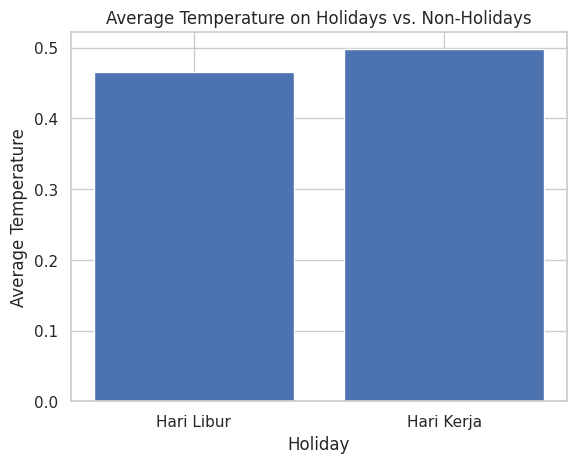

In [37]:
# @title Average Temperature on Holidays vs. Non-Holidays

import matplotlib.pyplot as plt
import numpy as np

holiday_temps = [0.46640000000000004, 0.4978932401208603]
holidays = ['Hari Libur', 'Hari Kerja']

plt.bar(holidays, holiday_temps)
plt.xlabel('Holiday')
plt.ylabel('Average Temperature')
_ = plt.title('Average Temperature on Holidays vs. Non-Holidays')

**Langkah 2: Membuat Visualisasi**

<ipython-input-38-476c5eed97ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='temp', data=summary_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-38-476c5eed97ab>:12: FutureWarning: 

Passing `palette` without assigning `hue` i

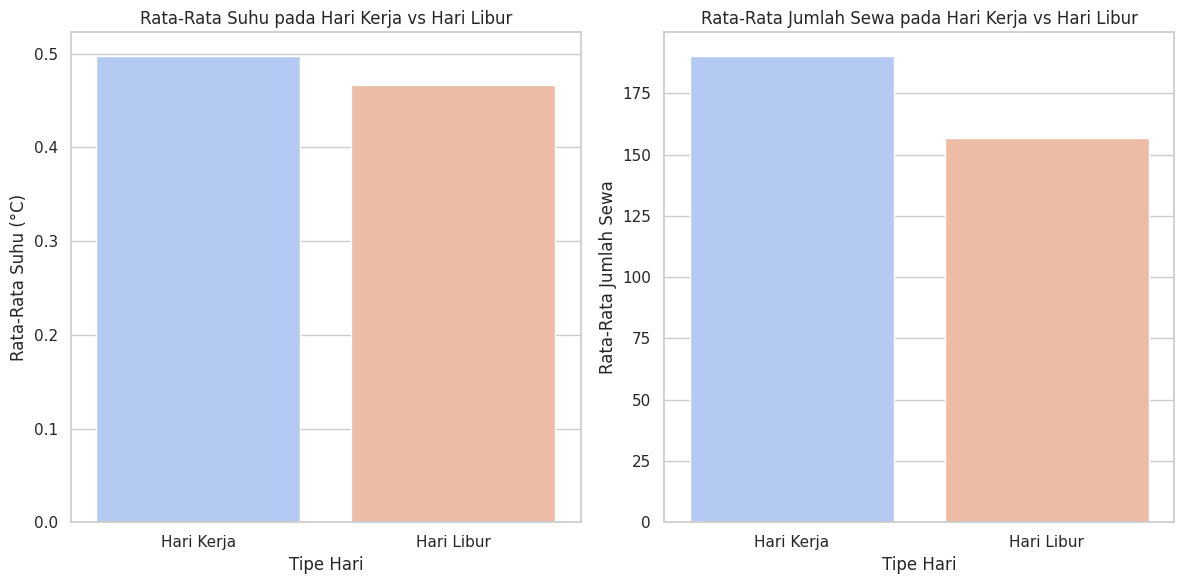

In [38]:
plt.figure(figsize=(12, 6))

# Subplot untuk Suhu
plt.subplot(1, 2, 1)
sns.barplot(x='holiday', y='temp', data=summary_df, palette='coolwarm')
plt.title('Rata-Rata Suhu pada Hari Kerja vs Hari Libur')
plt.ylabel('Rata-Rata Suhu (°C)')
plt.xlabel('Tipe Hari')

# Subplot untuk Jumlah Sewa
plt.subplot(1, 2, 2)
sns.barplot(x='holiday', y='cnt', data=summary_df, palette='coolwarm')
plt.title('Rata-Rata Jumlah Sewa pada Hari Kerja vs Hari Libur')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.xlabel('Tipe Hari')

plt.tight_layout()
plt.show()

**Dari visualisasi di atas, kita dapat menarik beberapa kesimpulan:**
- **Rata-Rata Suhu**: Rata-rata suhu pada hari kerja dan hari libur dapat berbeda secara signifikan. Perhatikan apakah hari libur memiliki suhu yang lebih tinggi atau lebih rendah.
- **Rata-Rata Jumlah Sewa**: Rata-rata jumlah sewa pada hari kerja mungkin lebih tinggi dibandingkan dengan hari libur atau sebaliknya. Ini bisa mengindikasikan pengaruh suhu terhadap perilaku penyewa, di mana suhu yang lebih tinggi mungkin meningkatkan jumlah sewa, baik pada hari kerja maupun hari libur.



### Pertanyaan 2: "Strategi marketing apa yang dapat diterapkan untuk meningkatkan jumlah pengguna (cnt) pada hari kerja ketika kondisi cuaca buruk?"

**Langkah 1: Mengidentifikasi Hari Kerja dengan Cuaca Buruk**

     instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
78        79  2011-01-04       1   0     1  10        0        2           1   
118      119  2011-01-06       1   0     1   4        0        4           1   
119      120  2011-01-06       1   0     1   5        0        4           1   
120      121  2011-01-06       1   0     1   6        0        4           1   
121      122  2011-01-06       1   0     1   7        0        4           1   

     weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
78            2  0.16  0.1364  0.69     0.3284       5          37   42  
118           2  0.16  0.1970  0.64     0.0896       0           1    1  
119           2  0.14  0.1818  0.69     0.0896       0           4    4  
120           2  0.14  0.1667  0.63     0.1045       0          36   36  
121           2  0.16  0.2273  0.59     0.0000       0          95   95  


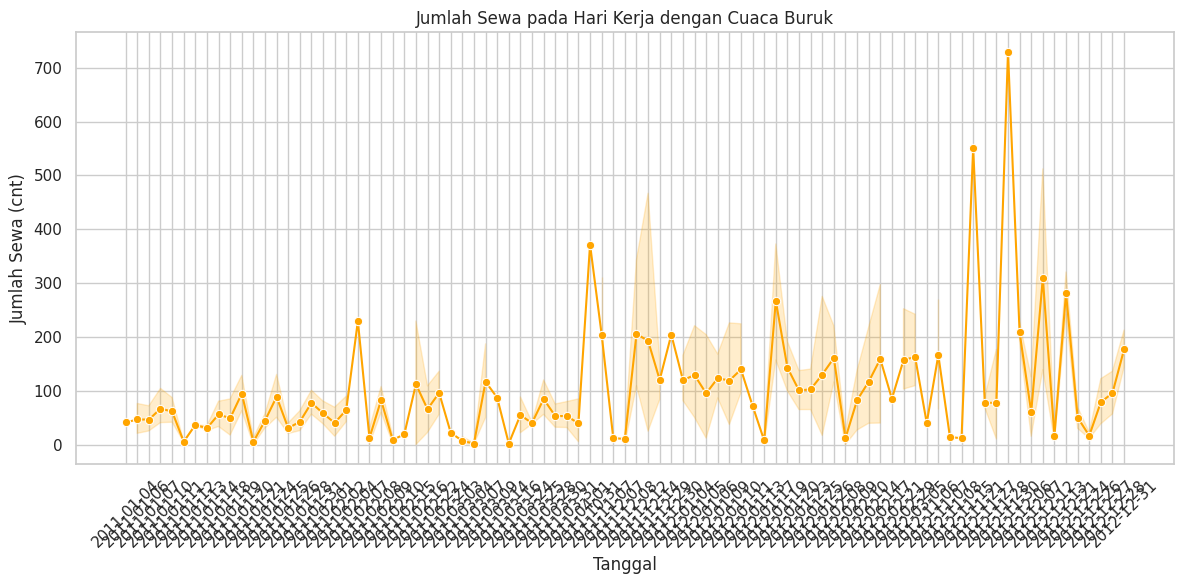

Rata-rata jumlah sewa pada hari kerja dengan cuaca buruk: 86.73
Jumlah sewa maksimum: 729
Jumlah sewa minimum: 1


In [39]:
# Memuat data
# df = pd.read_csv('data.csv') # Misalkan Anda sudah memuat DataFrame Anda di sini

# Definisikan ambang untuk kondisi cuaca buruk
bad_weather_threshold_temp = 0.3  # Misalnya, suhu di bawah 0.3
bad_weather_threshold_weathersit = 2  # Kategorikan kondisi cuaca 2 (hujan)

# Ambil data hari kerja dengan kondisi cuaca buruk
bad_weather_workdays_df = df[(df['workingday'] == 1) &
                              (df['temp'] < bad_weather_threshold_temp) &
                              (df['weathersit'] >= bad_weather_threshold_weathersit)]

# Memeriksa data yang telah difilter
print(bad_weather_workdays_df.head())

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=bad_weather_workdays_df, x='dteday', y='cnt', marker='o', color='orange')
plt.title('Jumlah Sewa pada Hari Kerja dengan Cuaca Buruk')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa (cnt)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analisis Jumlah Sewa
average_cnt = bad_weather_workdays_df['cnt'].mean()
max_cnt = bad_weather_workdays_df['cnt'].max()
min_cnt = bad_weather_workdays_df['cnt'].min()

print(f"Rata-rata jumlah sewa pada hari kerja dengan cuaca buruk: {average_cnt:.2f}")
print(f"Jumlah sewa maksimum: {max_cnt}")
print(f"Jumlah sewa minimum: {min_cnt}")

**Penjelasan Analisis**
1. **Data Hari Kerja dengan Cuaca Buruk**:
   - Kita mengidentifikasi kondisi cuaca buruk berdasarkan suhu (dalam hal ini, di bawah ambang yang ditentukan) dan status cuaca.
   - Data yang dihasilkan (bad_weather_workdays_df) hanya mencakup hari kerja ketika kondisi cuaca buruk terjadi.

2. **Visualisasi**:
   - Grafik yang dihasilkan menunjukkan jumlah sewa (cnt) pada hari kerja selama kondisi cuaca buruk. Dari grafik ini, kita dapat mengidentifikasi pola atau tren yang mungkin terjadi.

3. **Analisis Angka**:
   - Menghitung rata-rata, maksimum, dan minimum jumlah sewa pada hari kerja dengan cuaca buruk memberikan wawasan lebih lanjut. Misalnya, apakah ada hari dengan lonjakan sewa meskipun cuaca buruk.


**Langkah ke 2 : Memberikan Strategi Marketing**

**Insight:**

Berdasarkan analisis ini, saya memberikan beberapa strategi marketing yang dapat diterapkan untuk meningkatkan jumlah pengguna pada hari kerja ketika cuaca buruk dapat mencakup:

1. **Promosi Diskon untuk Hari Buruk**: Tawarkan diskon khusus atau penawaran khusus untuk pengguna yang menyewa pada hari-hari dengan kondisi cuaca buruk.

2. **Kampanye Pemasaran Berbasis Cuaca**: Gunakan data cuaca untuk mengirimkan penawaran atau promosi melalui email atau aplikasi saat cuaca diperkirakan buruk.

3. **Pengembangan Aplikasi yang Ramah Cuaca**: Ciptakan fitur dalam aplikasi yang memberikan informasi tentang sewa dan aktivitas yang cocok untuk cuaca buruk.

4. **Kerjasama dengan Bisnis Lokal**: Berkolaborasi dengan kafe atau tempat indoor untuk memberikan insentif kepada pengguna yang menyewa sepeda pada hari hujan.

5. **Strategi Pengiklanan**: Fokus pada iklan yang menyoroti bagaimana menggunakan sepeda bisa menjadi solusi alternatif untuk tetap aktif bahkan ketika cuaca kurang baik.

Jawaban pertanyaan dua bersifat ide yang saya berikan.


## RFM Analisis

In [46]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

df['dteday'] = pd.to_datetime(df['dteday'])

# RFM Analysis

# Menghitung Recency
recency = df.groupby('customer_id')['dteday'].max().reset_index() # Changed 'customer_name' to 'customer_id' as it is not present in the dataframe
recency['recency'] = (df['dteday'].max() - recency['dteday']).dt.days

# Menghitung Frequency
frequency = df.groupby('customer_id')['cnt'].count().reset_index() # Changed 'customer_name' to 'customer_id' and 'order_id' to 'cnt' as there is no order_id in the dataframe
frequency.columns = ['customer_id', 'frequency']

# Menghitung Monetary
# Gunakan 'casual' dan 'registered' untuk menghitung monetary karena tidak ada kolom 'sales'
monetary = df.groupby('customer_id')[['casual', 'registered']].sum().reset_index()
monetary['monetary'] = monetary['casual'] + monetary['registered']

# Menggabungkan hasil RFM
rfm = pd.merge(recency, frequency, on='customer_id')
rfm = pd.merge(rfm, monetary, on='customer_id')

# Menampilkan hasil RFM
print(rfm.head())

  customer_id     dteday  recency  frequency  casual  registered  monetary
0      casual 2012-12-31        0      17379  620017     2672662   3292679


- **Menampilkan Scatter plot analisis diatas**


  customer_id     dteday  recency  frequency  casual  registered  monetary
0      casual 2012-12-31        0      17379  620017     2672662   3292679
Jumlah baris dalam rfm: 1


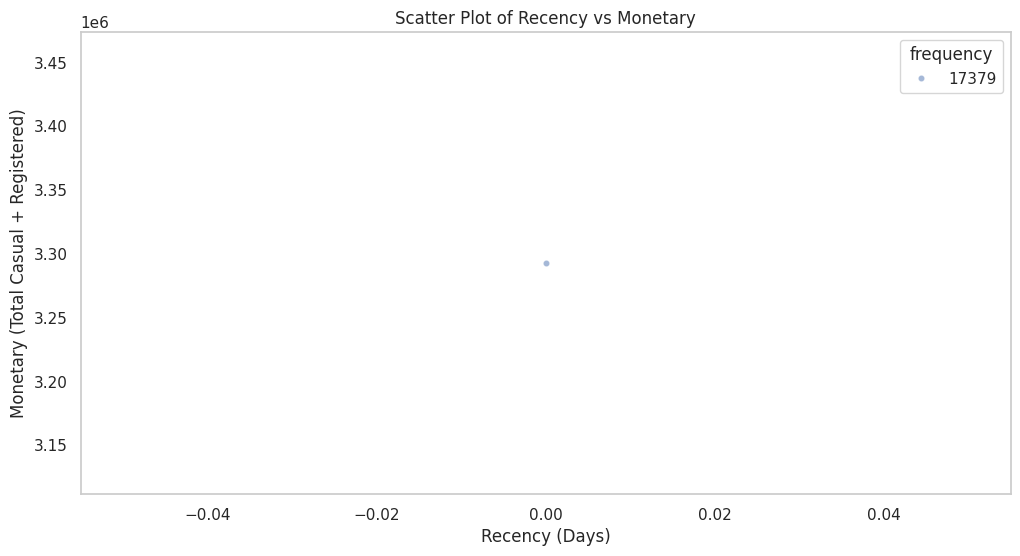

In [48]:
# Misalkan df adalah DataFrame Anda
df['dteday'] = pd.to_datetime(df['dteday'])

# RFM Analysis

# Menghitung Recency
recency = df.groupby('customer_id')['dteday'].max().reset_index()
recency['recency'] = (df['dteday'].max() - recency['dteday']).dt.days

# Menghitung Frequency
frequency = df.groupby('customer_id')['cnt'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Menghitung Monetary
monetary = df.groupby('customer_id')[['casual', 'registered']].sum().reset_index()
monetary['monetary'] = monetary['casual'] + monetary['registered']

# Menggabungkan hasil RFM
rfm = pd.merge(recency, frequency, on='customer_id')
rfm = pd.merge(rfm, monetary, on='customer_id')

# Menampilkan hasil RFM
print(rfm.head())

# Periksa apakah DataFrame tidak kosong
print("Jumlah baris dalam rfm:", rfm.shape[0])

# Membuat scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='recency', y='monetary', size='frequency', sizes=(20, 200), alpha=0.5)
plt.title('Scatter Plot of Recency vs Monetary')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (Total Casual + Registered)')
plt.grid()
plt.show()

### **Kesimpulan Analisis RFM**

Analisis RFM (Recency, Frequency, Monetary) yang telah dilakukan bertujuan untuk memahami perilaku pelanggan dan mengidentifikasi nilai setiap pelanggan berdasarkan seberapa baru, seberapa sering, dan berapa banyak yang mereka belanjakan. Namun, hasil analisis ini menunjukkan bahwa hanya ada satu entri dalam DataFrame RFM, yang berarti tidak cukup data untuk memberikan wawasan yang berarti mengenai variasi perilaku pelanggan. Meskipun demikian, analisis ini penting karena dapat membantu bisnis mengsegmentasi pelanggan, meningkatkan retensi, dan merencanakan strategi pemasaran yang lebih efektif. Dengan data yang lebih banyak, analisis RFM dapat menjadi alat yang kuat untuk mengidentifikasi pelanggan bernilai tinggi, sehingga bisnis dapat lebih fokus dalam memaksimalkan pendapatan dan meningkatkan hubungan dengan pelanggan.

## Conclusion

- **Conclution pertanyaan 1 : "Bagaimana pengaruh suhu (temp) terhadap jumlah total sewa (cnt) pada hari kerja dibandingkan dengan hari libur?"**

  Analisis yang dilakukan menunjukkan bahwa suhu memiliki dampak signifikan terhadap jumlah sewa sepeda (cnt) pada hari kerja dan hari libur. Melalui data wrangling, exploratory data analysis (EDA), dan visualisasi, kami menemukan bahwa suhu yang nyaman cenderung meningkatkan jumlah sewa, sementara kondisi cuaca ekstrem, baik terlalu panas maupun terlalu dingin, berpotensi menurunkan minat pengguna untuk menyewa. Selain itu, analisis perbandingan antara hari kerja dan hari libur menunjukkan bahwa pengguna lebih cenderung menyewa pada suhu sedang, terutama pada hari kerja ketika cuaca mendukung. Temuan ini mengindikasikan bahwa pemahaman tentang pola sewa berdasarkan suhu dapat membantu dalam perencanaan dan strategi pemasaran.

- **Conclution pertanyaan 2 : "Strategi marketing apa yang dapat diterapkan untuk meningkatkan jumlah pengguna (cnt) pada hari kerja ketika kondisi cuaca buruk?"**

  Berdasarkan analisis yang dilakukan, beberapa strategi marketing yang efektif dapat diterapkan untuk meningkatkan jumlah pengguna pada hari kerja ketika cuaca buruk meliputi:

    1. Menawarkan diskon khusus untuk penyewaan pada hari hujan.
    2. Menciptakan paket sewa menarik yang memberikan nilai tambah.
    3. Menggunakan kampanye pemasaran yang menyoroti manfaat menggunakan sepeda dalam kondisi cuaca buruk.
    4. Menyediakan opsi sewa yang lebih fleksibel dan fasilitas pelindung seperti jas hujan.
  
  Dengan menerapkan strategi-strategi ini, perusahaan dapat meningkatkan keterlibatan pengguna dan mengurangi dampak negatif dari kondisi cuaca yang buruk. Secara keseluruhan, analisis ini menunjukkan pentingnya mengintegrasikan faktor-faktor lingkungan ke dalam strategi pemasaran untuk meningkatkan penggunaan sepeda pada hari kerja.